In [1]:
! pip install -q tensorflow-io

     |████████████████████████████████| 25.4MB 134kB/s 


In [2]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow_io as tfio
import tensorflow as tf
import importlib
import yaml

from google.colab import auth
from pathlib import Path
from tqdm import tqdm 

In [3]:
auth.authenticate_user()

In [4]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   103k      0 --:--:-- --:--:-- --:--:--  103k
OK
45 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.8 MB of archives.
After this operation, 23.1 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.35.0_amd64.deb ...
Unpacking gcsfuse (0.35.0) ...
Setting up gcsfuse (0.35.0) ...


In [5]:
!mkdir DataSet
!gcsfuse autovc_datasets DataSet

2021/04/28 12:25:53.877277 Using mount point: /content/DataSet
2021/04/28 12:25:53.884121 Opening GCS connection...
2021/04/28 12:25:54.082400 Mounting file system "autovc_datasets"...
2021/04/28 12:25:54.097050 File system has been successfully mounted.


In [20]:
import DataProcessing as dp
from utils import *
importlib.reload(dp)

<module 'DataProcessing' from '/content/DataProcessing.py'>

In [9]:
config = yaml.load(Path("config.yml").read_text(), Loader=yaml.SafeLoader)

# Processing and writing Librispeech files

In [10]:
bucket_name = config["bucket_name"]  # Name of how bucket is mounted
datasets = ["dev-clean"] # empty for vctk since there is just one
writer = dp.DataWriter(bucket_name, datasets, config)

In [11]:
writer.process_datasets()

Processing data for speaker: 1272
Processing data for speaker: 1462
Processing data for speaker: 1673
Processing data for speaker: 174
Processing data for speaker: 1919
Processing data for speaker: 1988
Processing data for speaker: 1993
Processing data for speaker: 2035
Processing data for speaker: 2078
Processing data for speaker: 2086
Processing data for speaker: 2277
Processing data for speaker: 2412
Processing data for speaker: 2428
Processing data for speaker: 251
Processing data for speaker: 2803
Processing data for speaker: 2902
Processing data for speaker: 3000
Processing data for speaker: 3081
Processing data for speaker: 3170
Processing data for speaker: 3536
Processing data for speaker: 3576
Processing data for speaker: 3752
Processing data for speaker: 3853
Processing data for speaker: 422
Processing data for speaker: 5338
Processing data for speaker: 5536
Processing data for speaker: 5694
Processing data for speaker: 5895
Processing data for speaker: 6241
Processing data f

# Reading Librispeech files

In [12]:
reader = dp.DataReader(config)
reader.load_datasets()

In [15]:
datasets = reader.get_datasets()
dataset = datasets["237"]

An example of the Librispeech dataset looks as follows:

```
{
  'label': <tf.Tensor: shape=(), dtype=int64, numpy=237>, 
  'subset': <tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x07\x12\x00B\x05train'>, 
  'mel_spectrogram': <tf.Tensor: shape=(1,), dtype=string, numpy=array[b'\x08\x01\x12\t'], dtype=object)>
}

```



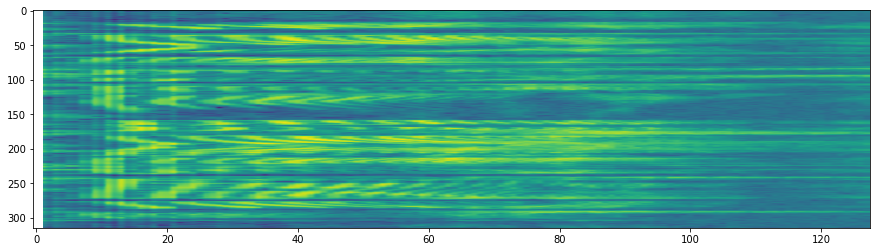

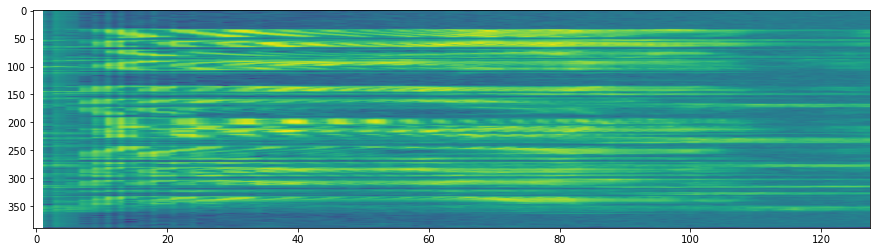

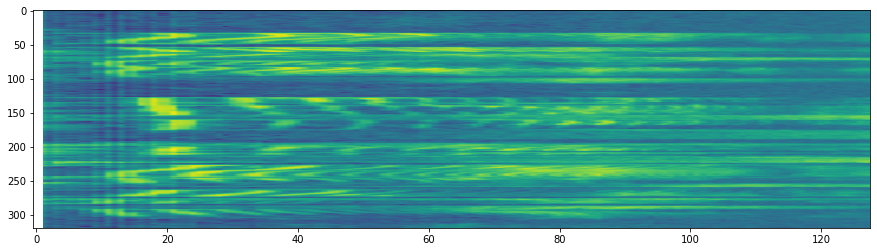

In [24]:
for example in dataset.take(3):

  # Parse the specgrogram (binary -> tensor)
  example = parse_spectrograms(example)

  # Plot spectrogram
  tensor = example["mel_spectrogram"]
  plt.figure(figsize=(15,4))
  data = tf.math.log(tensor).numpy()
  plt.imshow(data, aspect="auto")
  plt.show()

